In [26]:
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
import requests
import json

url = "https://opendata.aemet.es/opendata/sh/f4c6c3c3"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
else:
    print("Error en la solicitud a la API")
    data = None

In [21]:
df = pd.json_normalize(data)
df

,fecha,indicativo,p_max,n_cub,hr,nw_55,tm_min,ta_max,ts_min,nt_30,...,w_rec,e,np_300,p_mes,w_med,nt_00,ti_max,tm_mes,tm_max,np_010
0,2022-1,9111,10.1(04),8.0,71.0,2.0,-0.5,16.7(02),8.6,0.0,...,143.0,58.0,0.0,18.7,6.0,20.0,3.2,4.3,9.0,5.0
1,2022-2,9111,1.1(13),9.0,67.0,0.0,0.9,16.6(22),6.3,0.0,...,138.0,64.0,0.0,3.0,6.0,10.0,6.6,6.5,12.1,1.0
2,2022-3,9111,20.1(03),23.0,77.0,0.0,3.4,16.5(01),7.5,0.0,...,207.0,78.0,0.0,66.4,10.0,0.0,5.4,7.2,10.9,13.0
3,2022-4,9111,13.3(27),12.0,69.0,3.0,3.6,21.6(11),8.6,0.0,...,168.0,82.0,0.0,66.0,8.0,6.0,4.7,8.8,14.0,12.0
4,2022-5,9111,10.9(02),10.0,63.0,1.0,8.8,28.6(22),13.7,0.0,...,139.0,113.0,0.0,24.2,7.0,0.0,10.0,15.1,21.4,4.0
5,2022-6,9111,5.2(04),13.0,53.0,0.0,11.9,37.7(18),17.7,7.0,...,152.0,121.0,0.0,15.1,8.0,0.0,16.2,19.6,27.2,4.0
6,2022-7,9111,0.1(03),4.0,48.0,0.0,13.4,38.3(16),18.1,14.0,...,189.0,127.0,0.0,0.1,9.0,0.0,20.7,21.8,30.1,0.0
7,2022-8,9111,9.2(11),5.0,53.0,2.0,14.4,36.2(12),18.5,17.0,...,174.0,141.0,0.0,31.0,9.0,0.0,21.7,22.1,29.8,7.0
8,2022-9,9111,12.5(15),10.0,58.0,2.0,11.0,32.0(11),16.7,4.0,...,157.0,113.0,0.0,32.5,8.0,0.0,13.6,17.4,23.8,4.0
9,2022-10,9111,22.3(10),11.0,59.0,6.0,NaN,NaN,NaN,NaN,...,148.0,107.0,0.0,33.8,7.0,NaN,NaN,NaN,NaN,6.0


In [29]:
df = df[['fecha', 'tm_min', 'tm_mes', 'tm_max', 'p_mes', 'np_001']]

In [34]:
tiempo_burgos = df
tiempo_burgos

,fecha,tm_min,tm_mes,tm_max,p_mes,np_001
0,2022-1,-0.5,4.3,9.0,18.7,6.0
1,2022-2,0.9,6.5,12.1,3.0,7.0
2,2022-3,3.4,7.2,10.9,66.4,19.0
3,2022-4,3.6,8.8,14.0,66.0,14.0
4,2022-5,8.8,15.1,21.4,24.2,12.0
5,2022-6,11.9,19.6,27.2,15.1,13.0
6,2022-7,13.4,21.8,30.1,0.1,1.0
7,2022-8,14.4,22.1,29.8,31.0,8.0
8,2022-9,11.0,17.4,23.8,32.5,8.0
9,2022-10,NaN,NaN,NaN,33.8,9.0


In [31]:

tiempo_burgos = tiempo_burgos.drop(12)
tiempo_burgos


,fecha,tm_min,tm_mes,tm_max,p_mes,np_001
0,2022-1,-0.5,4.3,9.0,18.7,6.0
1,2022-2,0.9,6.5,12.1,3.0,7.0
2,2022-3,3.4,7.2,10.9,66.4,19.0
3,2022-4,3.6,8.8,14.0,66.0,14.0
4,2022-5,8.8,15.1,21.4,24.2,12.0
5,2022-6,11.9,19.6,27.2,15.1,13.0
6,2022-7,13.4,21.8,30.1,0.1,1.0
7,2022-8,14.4,22.1,29.8,31.0,8.0
8,2022-9,11.0,17.4,23.8,32.5,8.0
9,2022-10,NaN,NaN,NaN,33.8,9.0


In [33]:
tiempo_burgos['tm_min'].fillna(8.2, inplace=True)
tiempo_burgos['tm_mes'].fillna(13.6, inplace=True)
tiempo_burgos['tm_max'].fillna(19, inplace=True)
tiempo_burgos

,fecha,tm_min,tm_mes,tm_max,p_mes,np_001
0,2022-1,-0.5,4.3,9.0,18.7,6.0
1,2022-2,0.9,6.5,12.1,3.0,7.0
2,2022-3,3.4,7.2,10.9,66.4,19.0
3,2022-4,3.6,8.8,14.0,66.0,14.0
4,2022-5,8.8,15.1,21.4,24.2,12.0
5,2022-6,11.9,19.6,27.2,15.1,13.0
6,2022-7,13.4,21.8,30.1,0.1,1.0
7,2022-8,14.4,22.1,29.8,31.0,8.0
8,2022-9,11.0,17.4,23.8,32.5,8.0
9,2022-10,8.2,13.6,19,33.8,9.0


In [35]:
tiempo_burgos.to_csv("../Data/tiempo_burgos.csv", index=False)

In [36]:
import requests
import json

url = "https://opendata.aemet.es/opendata/sh/e413431d"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
else:
    print("Error")
    data = None

In [37]:
tiempo_madrid = pd.json_normalize(data)
tiempo_madrid

,fecha,indicativo,p_max,n_cub,hr,n_gra,n_fog,q_max,q_mar,q_med,...,n_nie,tm_mes,tm_max,q_min,np_010,nw_55,w_racha,nw_91,w_rec,w_med
0,2022-1,3195,7.3(04),5.0,59.0,0.0,0.0,955.5(29),1027.4,948.0,...,0.0,7.1,11.6,931.7(04),2.0,NaN,NaN,NaN,NaN,NaN
1,2022-2,3195,3.9(25),6.0,54.0,0.0,0.0,952.4(08),1024.2,946.0,...,0.0,10.2,15.1,937.4(18),3.0,NaN,NaN,NaN,NaN,NaN
2,2022-3,3195,NaN,24.0,69.0,NaN,NaN,948.3(01),1017.1,939.3,...,NaN,10.0,13.3,925.8(30),NaN,NaN,NaN,NaN,NaN,NaN
3,2022-4,3195,22.8(22),10.0,57.0,0.0,0.0,948.4(29),1013.3,936.6,...,0.0,12.9,18.2,920.1(22),9.0,0.0,26/14.7(23),0.0,207.0,10.0
4,2022-5,3195,2.6(03),6.0,43.0,0.0,0.0,947.3(26),1014.6,940.0,...,0.0,20.6,26.9,928.9(29),2.0,0.0,23/13.3(21),0.0,189.0,8.0
5,2022-6,3195,0.2(22),4.0,35.0,0.0,0.0,945.0(16),1012.2,938.8,...,0.0,24.8,31.3,931.3(21),0.0,0.0,07/12.8(15),0.0,197.0,8.0
6,2022-7,3195,8.2(06),0.0,NaN,0.0,0.0,948.0(08),1013.3,940.9,...,0.0,29.6,36.8,934.4(27),2.0,1.0,24/16.9(30),0.0,180.0,7.0
7,2022-8,3195,2.1(17),3.0,33.0,0.0,0.0,944.9(19),1011.2,938.5,...,0.0,27.9,34.3,931.9(15),2.0,1.0,22/16.4(04),0.0,171.0,7.0
8,2022-9,3195,18.5(12),9.0,48.0,0.0,0.0,944.3(30),1012.8,938.4,...,0.0,21.5,26.8,930.7(29),4.0,1.0,24/17.2(13),0.0,175.0,7.0
9,2022-10,3195,8.8(20),13.0,59.0,0.0,0.0,950.4(02),1018.5,942.9,...,0.0,18.5,22.9,934.9(22),7.0,NaN,NaN,NaN,NaN,6.0


In [42]:
#limpio la tabla para dejar solo fecha, temperatura media del mes, la minima y la maxima, dias con lluvia y cantidad de lluvia
tiempo_madrid = tiempo_madrid[['fecha', 'tm_min', 'tm_mes', 'tm_max', 'p_mes', 'np_001']]
tiempo_madrid

,fecha,tm_min,tm_mes,tm_max,p_mes,np_001
0,2022-1,2.6,7.1,11.6,12.3,2.0
1,2022-2,5.2,10.2,15.1,8.7,5.0
2,2022-3,6.7,10.0,13.3,NaN,NaN
3,2022-4,7.5,12.9,18.2,62.7,12.0
4,2022-5,14.2,20.6,26.9,6.2,4.0
5,2022-6,18.1,24.8,31.3,0.3,2.0
6,2022-7,22.4,29.6,36.8,9.8,2.0
7,2022-8,21.4,27.9,34.3,4.9,3.0
8,2022-9,16.1,21.5,26.8,43.9,8.0
9,2022-10,14.1,18.5,22.9,27.8,10.0


In [46]:
# cambio los valores nan que me faltan por una media entre el mes anterior y el siguiente, ya que ese dato no lo tengo
# el mes de lluvia lo he cogiddo a mano de otra estacion de aemet de la misma ciudad
tiempo_madrid['tm_min'].fillna(11.5, inplace=True)
tiempo_madrid['tm_mes'].fillna(13.9, inplace=True)
tiempo_madrid['tm_max'].fillna(17.3, inplace=True)
tiempo_madrid['np_001'].fillna(17, inplace=True)
tiempo_madrid

,fecha,tm_min,tm_mes,tm_max,p_mes,np_001
0,2022-1,2.6,7.1,11.6,12.3,2.0
1,2022-2,5.2,10.2,15.1,8.7,5.0
2,2022-3,6.7,10.0,13.3,NaN,17
3,2022-4,7.5,12.9,18.2,62.7,12.0
4,2022-5,14.2,20.6,26.9,6.2,4.0
5,2022-6,18.1,24.8,31.3,0.3,2.0
6,2022-7,22.4,29.6,36.8,9.8,2.0
7,2022-8,21.4,27.9,34.3,4.9,3.0
8,2022-9,16.1,21.5,26.8,43.9,8.0
9,2022-10,14.1,18.5,22.9,27.8,10.0


In [22]:
tiempo_madrid.to_csv("../Data/tiempo_madrid.csv", index=False)

In [21]:
tiempo_madrid

,fecha,tm_min,tm_mes,tm_max,p_mes,np_001
0,2022-1,2.6,7.1,11.6,12.3,2.0
1,2022-2,5.2,10.2,15.1,8.7,5.0
2,2022-3,6.7,10.0,13.3,NaN,17.0
3,2022-4,7.5,12.9,18.2,62.7,12.0
4,2022-5,14.2,20.6,26.9,6.2,4.0
5,2022-6,18.1,24.8,31.3,0.3,2.0
6,2022-7,22.4,29.6,36.8,9.8,2.0
7,2022-8,21.4,27.9,34.3,4.9,3.0
8,2022-9,16.1,21.5,26.8,43.9,8.0
9,2022-10,14.1,18.5,22.9,27.8,10.0


In [6]:
tiempo_madrid= pd.read_csv("../Data/tiempo_madrid.csv")

In [23]:
tiempo_burgos['tm_min'].fillna(8.2, inplace=True)
tiempo_burgos['tm_mes'].fillna(13.6, inplace=True)
tiempo_burgos['tm_max'].fillna(19, inplace=True)
tiempo_burgos

,fecha,tm_min,tm_mes,tm_max,p_mes,np_001
0,2022-1,-0.5,4.3,9.0,18.7,6.0
1,2022-2,0.9,6.5,12.1,3.0,7.0
2,2022-3,3.4,7.2,10.9,66.4,19.0
3,2022-4,3.6,8.8,14.0,66.0,14.0
4,2022-5,8.8,15.1,21.4,24.2,12.0
5,2022-6,11.9,19.6,27.2,15.1,13.0
6,2022-7,13.4,21.8,30.1,0.1,1.0
7,2022-8,14.4,22.1,29.8,31.0,8.0
8,2022-9,11.0,17.4,23.8,32.5,8.0
9,2022-10,8.2,13.6,19.0,33.8,9.0


In [8]:
tiempo_burgos= pd.read_csv("../Data/tiempo_burgos.csv")

In [17]:
tiempo_burgos=tiempo_burgos.drop(12)

In [24]:
tiempo_burgos.to_csv("../Data/tiempo_burgos.csv", index=False)

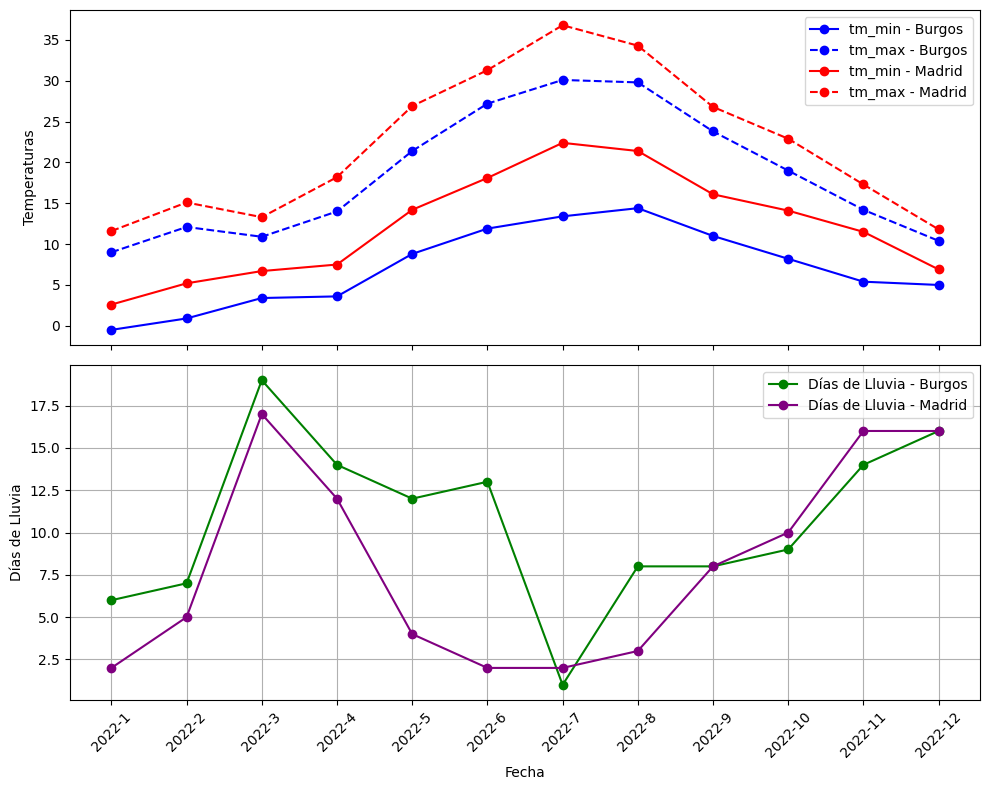

In [20]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Subplot 1: Temperaturas
ax1.plot(tiempo_burgos['fecha'], tiempo_burgos['tm_min'], marker='o', label='tm_min - Burgos', color='blue')
ax1.plot(tiempo_burgos['fecha'], tiempo_burgos['tm_max'], marker='o', label='tm_max - Burgos', color='blue', linestyle='--')
ax1.plot(tiempo_madrid['fecha'], tiempo_madrid['tm_min'], marker='o', label='tm_min - Madrid', color='red')
ax1.plot(tiempo_madrid['fecha'], tiempo_madrid['tm_max'], marker='o', label='tm_max - Madrid', color='red', linestyle='--')
ax1.set_ylabel('Temperaturas')
ax1.legend()

# Subplot 2: Días de Lluvia
ax2.plot(tiempo_burgos['fecha'], tiempo_burgos['np_001'], marker='o', label='Días de Lluvia - Burgos', color='green')
ax2.plot(tiempo_madrid['fecha'], tiempo_madrid['np_001'], marker='o', label='Días de Lluvia - Madrid', color='purple')
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Días de Lluvia')
ax2.legend()

# Ajustar las etiquetas del eje x para que se vean bien
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
#plt.savefig('../img/tiempo_lluvia.jpg', bbox_inches='tight')
plt.show()

In [25]:
dicc = { 'Comunidad' : ['Burgos' , 'Madrid'],
        'Puntuacion tiempo': [19, 1]
        }

In [27]:
dftiempo = pd.DataFrame(dicc)

In [28]:
dftiempo

,Comunidad,Puntuacion tiempo
0,Burgos,19
1,Madrid,1


In [29]:
dftiempo.to_csv('../Data/puntuacion_tiempo.csv', index=False)

In [4]:
# limpieza dataframe teletrabnajo
df_1 = pd.read_csv("../Data/incidencia_teletrabajo_comunidad.csv", sep=";")
filtro = ((df_1['Teletrabajo'] == 'Personas que han teletrabajado') | (df_1['Teletrabajo'] == 'Total')) & (df_1['Clase de población'] == 'Total personas (16 a 74 años)')

personas_teletrabajo = df_1[filtro]
personas_teletrabajo.reset_index(drop=True, inplace=True)
personas_teletrabajo
filtro2 = personas_teletrabajo['Teletrabajo'] != 'Total'
personas_teletrabajo= personas_teletrabajo[filtro2]

personas_teletrabajo.reset_index(drop=True, inplace=True)
personas_teletrabajo.drop(0, inplace=True)
personas_teletrabajo.reset_index(drop=True, inplace=True)
personas_teletrabajo

,Clase de población,Total Nacional,Comunidades y Ciudades Autónomas,Teletrabajo,Total
0,Total personas (16 a 74 años),Total nacional,Andalucía,Personas que han teletrabajado,"6,2"
1,Total personas (16 a 74 años),Total nacional,Aragón,Personas que han teletrabajado,"7,3"
2,Total personas (16 a 74 años),Total nacional,"Asturias, Principado de",Personas que han teletrabajado,"5,7"
3,Total personas (16 a 74 años),Total nacional,"Balears, Illes",Personas que han teletrabajado,"4,5"
4,Total personas (16 a 74 años),Total nacional,Canarias,Personas que han teletrabajado,"7,0"
5,Total personas (16 a 74 años),Total nacional,Cantabria,Personas que han teletrabajado,"3,5"
6,Total personas (16 a 74 años),Total nacional,Castilla y León,Personas que han teletrabajado,"5,6"
7,Total personas (16 a 74 años),Total nacional,Castilla-La Mancha,Personas que han teletrabajado,"4,5"
8,Total personas (16 a 74 años),Total nacional,Cataluña,Personas que han teletrabajado,"13,4"
9,Total personas (16 a 74 años),Total nacional,Comunitat Valenciana,Personas que han teletrabajado,"7,7"


In [5]:

personas_teletrabajo.drop(columns=['Clase de población', 'Total Nacional', 'Teletrabajo'], inplace=True)

In [12]:
personas_teletrabajo.rename(columns={'Total' : 'Porcentaje de teletrabajadores'}, inplace=True)

In [19]:
personas_teletrabajo['Porcentaje de teletrabajadores'] = personas_teletrabajo['Porcentaje de teletrabajadores'].str.replace(',', '.')

personas_teletrabajo['Porcentaje de teletrabajadores'] = personas_teletrabajo['Porcentaje de teletrabajadores'].astype(float)

In [22]:
personas_teletrabajo.to_csv('../Data/porcentaje_teletrabajo.csv', index=False)

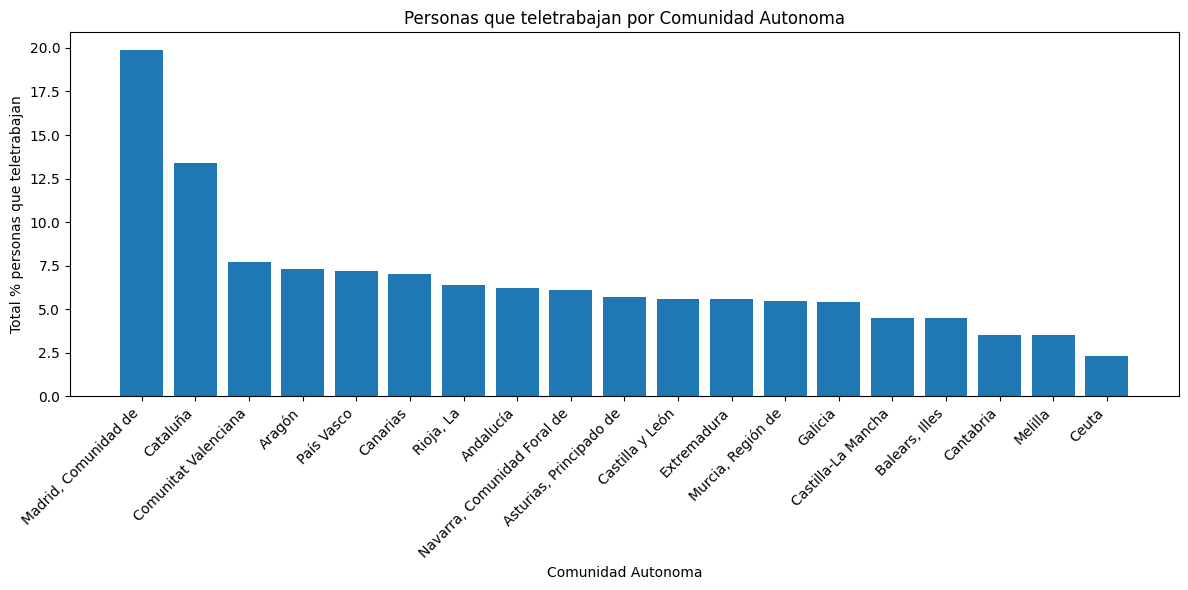

In [21]:
# GENERACION DE GRAFICO TELETRABAJO

personas_teletrabajo = personas_teletrabajo.sort_values(by='Porcentaje de teletrabajadores', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(personas_teletrabajo['Comunidades y Ciudades Autónomas'], personas_teletrabajo['Porcentaje de teletrabajadores'])
plt.title('Personas que teletrabajan por Comunidad Autonoma')
plt.xlabel('Comunidad Autonoma')
plt.ylabel('Total % personas que teletrabajan')
plt.xticks(rotation=45, ha="right", fontsize=10) #mueve un poco las etiquetas para que no se tapen entre ellas
plt.tight_layout() #recortar etiquetas
#plt.savefig('../img/teletrabajo.jpg', bbox_inches='tight')
plt.show()



In [24]:
#limpieza del dataframe df_2 acceso a internet
df_2 = pd.read_csv("../Data/acceso_internet.csv", sep=";")
df_2.head(20)


,Total Nacional,Comunidades y Ciudades Autónomas,Motivos no acceso,Total
0,Total nacional,NaN,Total de viviendas sin acceso a Internet,660.001
1,Total nacional,NaN,Acceso a internet desde otro lugar,"3,5"
2,Total nacional,NaN,No necesitan internet,"77,2"
3,Total nacional,NaN,Costes del equipo/conexión demasiado elevados,"26,4"
4,Total nacional,NaN,Pocos conocimientos para utilizarlo,"57,4"
5,Total nacional,NaN,Banda ancha fija no disponible en su área,"5,9"
6,Total nacional,NaN,Banda ancha móvil no disponible en su área,"5,7"
7,Total nacional,Andalucía,Total de viviendas sin acceso a Internet,158.152
8,Total nacional,Andalucía,Acceso a internet desde otro lugar,"5,4"
9,Total nacional,Andalucía,No necesitan internet,"76,6"


In [25]:
#df_2['Total'] = df_2['Total'].str.replace('.', '')
df_2['Total'] = df_2['Total'].str.replace(',', '.')
df_2.tail(20)
#df_2['Total'] = df_2['Total'].astype(float)


,Total Nacional,Comunidades y Ciudades Autónomas,Motivos no acceso,Total
120,Total nacional,"Rioja, La",Acceso a internet desde otro lugar,2.7
121,Total nacional,"Rioja, La",No necesitan internet,69.5
122,Total nacional,"Rioja, La",Costes del equipo/conexión demasiado elevados,23.0
123,Total nacional,"Rioja, La",Pocos conocimientos para utilizarlo,49.9
124,Total nacional,"Rioja, La",Banda ancha fija no disponible en su área,10.1
125,Total nacional,"Rioja, La",Banda ancha móvil no disponible en su área,6.8
126,Total nacional,Ceuta,Total de viviendas sin acceso a Internet,1.807
127,Total nacional,Ceuta,Acceso a internet desde otro lugar,..
128,Total nacional,Ceuta,No necesitan internet,75.9
129,Total nacional,Ceuta,Costes del equipo/conexión demasiado elevados,52.3


In [ ]:
internet_total = df_2.iloc[7:]

internet_total['Total'] = internet_total['Total'].replace('..', 0)
filtro=internet_total['Motivos no acceso'].isin(['Banda ancha móvil no disponible en su área', 'Banda ancha fija no disponible en su área'])
internet_total = internet_total[filtro]
internet_total

In [27]:
internet_total['Total'] = internet_total['Total'].astype(float)


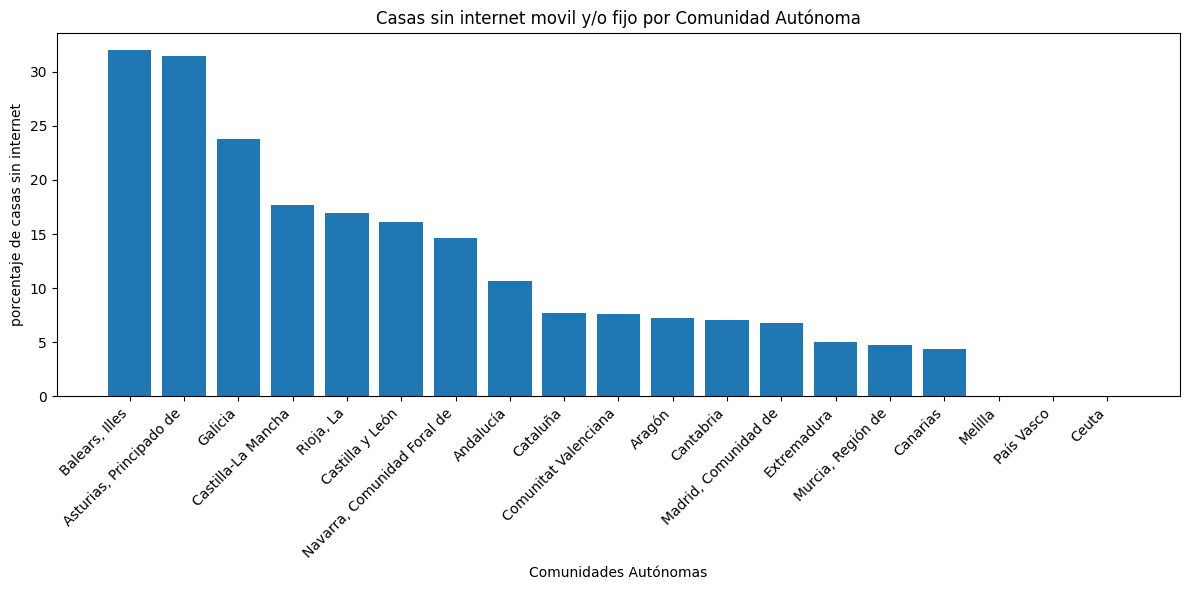

In [28]:
internet_total = internet_total.groupby('Comunidades y Ciudades Autónomas')['Total'].sum().reset_index()
internet_total
internet_total= internet_total.sort_values(by='Total', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(internet_total['Comunidades y Ciudades Autónomas'], internet_total['Total'])
# etiquetas y título
plt.xlabel('Comunidades Autónomas')
plt.ylabel('porcentaje de casas sin internet')
plt.title('Casas sin internet movil y/o fijo por Comunidad Autónoma')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.savefig('../img/internet.jpg', bbox_inches='tight')
#plt.tight_layout()
plt.show()

In [30]:
internet_total.rename(columns={'Total': 'Porcentaje de hogares sin internet'}, inplace=True)

In [31]:
internet_total.to_csv('../Data/internet_total.csv', index=False)

In [32]:
#dataframe 4
df_4 = pd.read_csv("../Data/esperanza_vida_por_nacimiento_comunidad.csv", sep= ";") 
df_4.head(20)

,Comunidades y Ciudades Autónomas,Sexo,Periodo,Total
0,01 Andalucía,Ambos sexos,2021,"81,49"
1,01 Andalucía,Ambos sexos,2020,"81,54"
2,01 Andalucía,Ambos sexos,2019,"82,22"
3,01 Andalucía,Ambos sexos,2018,"81,76"
4,01 Andalucía,Ambos sexos,2017,"81,83"
5,01 Andalucía,Ambos sexos,2016,"81,85"
6,01 Andalucía,Ambos sexos,2015,"81,37"
7,01 Andalucía,Ambos sexos,2014,"81,72"
8,01 Andalucía,Ambos sexos,2013,"81,49"
9,01 Andalucía,Ambos sexos,2012,"80,91"


In [ ]:
filtro = (df_4['Sexo'] == 'Ambos sexos') & (df_4['Periodo'] == 2021)
espe_vida = df_4[filtro]
espe_vida['Comunidades y Ciudades Autónomas'] = espe_vida['Comunidades y Ciudades Autónomas'].str.split(' ', expand=True, n=1).iloc[:, 1]
espe_vida = espe_vida.reset_index(drop=True)
espe_vida= espe_vida.sort_values(by='Total', ascending=False)
espe_vida['Total'] = espe_vida['Total'].str.replace(',', '.')
espe_vida['Total'] = espe_vida['Total'].astype(float)


In [36]:
espe_vida.rename(columns={'Total' : 'Esperanza vida ambos sexos'}, inplace=True)



In [41]:
espe_vida.to_csv('../Data/esperanza_vida.csv', index=False)

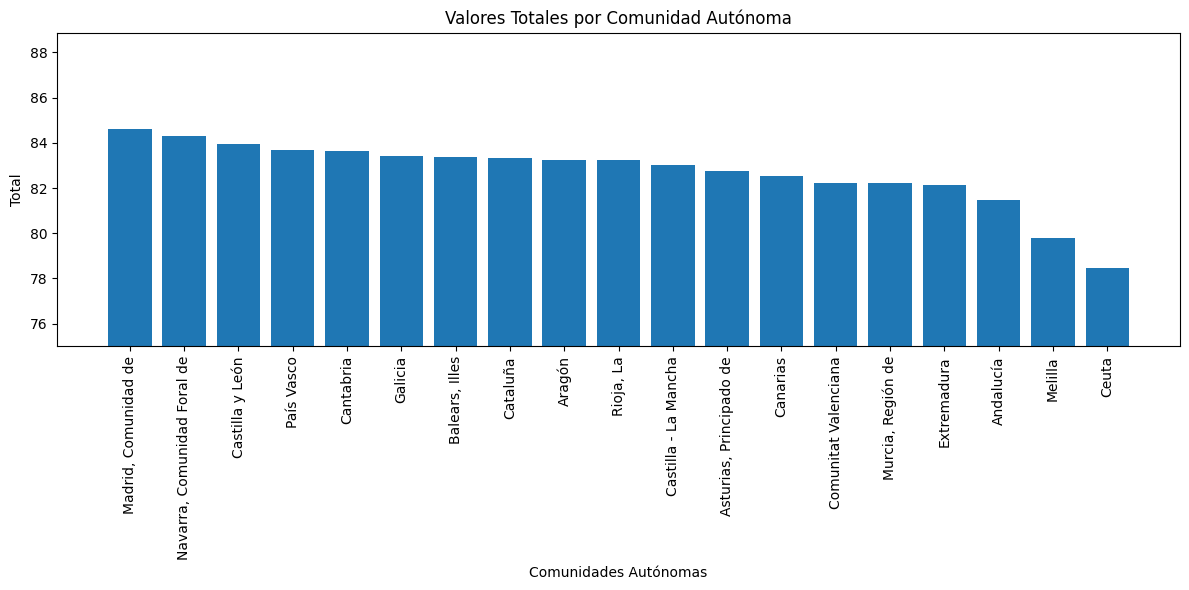

In [140]:
plt.figure(figsize=(12, 6))

plt.bar(espe_vida['Comunidades y Ciudades Autónomas'], espe_vida['Esperanza vida ambos sexos'])
plt.ylim(75)  
plt.xticks(rotation=90)

plt.xlabel('Comunidades Autónomas')
plt.ylabel('Total')
plt.title('Valores Totales por Comunidad Autónoma')

plt.tight_layout()
#plt.savefig('../img/esperanza_vida.jpg', bbox_inches='tight')
plt.show()

In [42]:
#grafica DF3

df_3 = pd.read_csv("../Data/poblacion_comunidad.csv", sep=";")
df_3 = df_3.loc[df_3['Periodo'] == '1/1/2020']
df_3['Provincias'] = df_3['Provincias'].fillna("Total")
df_3 = df_3.loc[df_3['Provincias'] == 'Total']
df_3.rename(columns={'Total': 'Poblacion total'}, inplace=True)
df_3 = df_3.drop(columns=['Islas','Total Nacional','Periodo','Provincias' ])
df_3 = df_3.drop(df_3.index[0])
df_3['Poblacion total'] = df_3['Poblacion total'].str.replace('.', '')
df_3['Poblacion total'] = df_3['Poblacion total'].astype(int)
df_3=df_3.reset_index(drop=True)
df_3= df_3.sort_values(by='Poblacion total', ascending=False)
df_3



,Comunidades y Ciudades Autónomas,Poblacion total
0,Andalucía,8464411
8,Cataluña,7780479
12,"Madrid, Comunidad de",6779888
9,Comunitat Valenciana,5057353
11,Galicia,2701819
6,Castilla y León,2394918
15,País Vasco,2220504
4,Canarias,2175952
7,Castilla - La Mancha,2045221
13,"Murcia, Región de",1511251


In [44]:
df_3.to_csv('../Data/poblacion.csv', index=False)

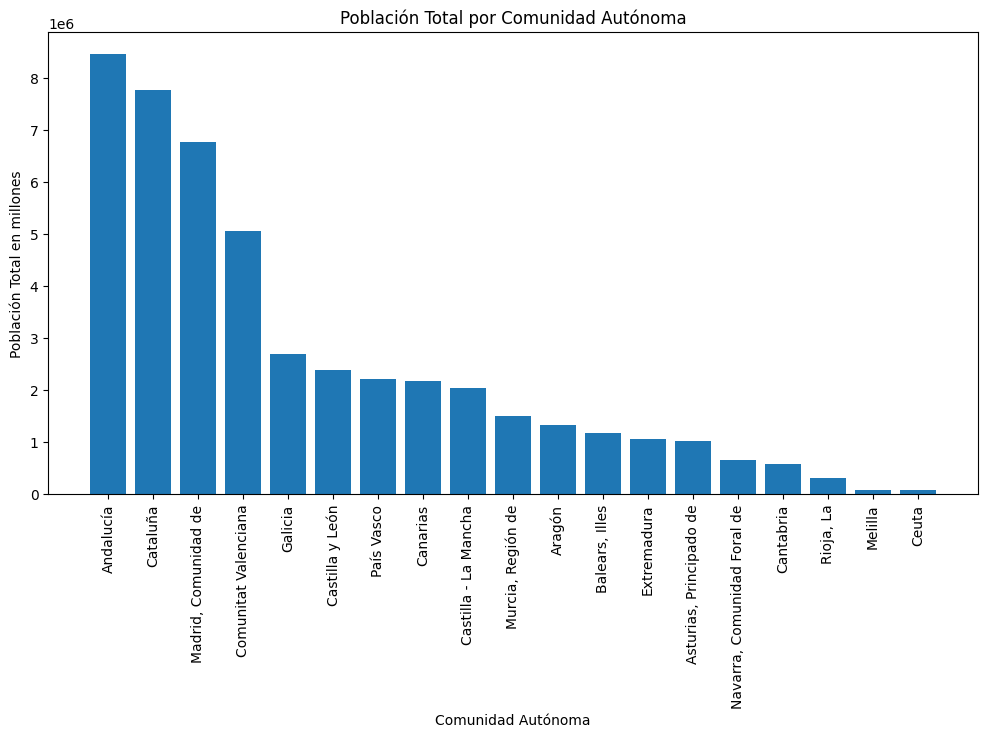

In [223]:
plt.figure(figsize=(12, 6))  
plt.bar(df_3['Comunidades y Ciudades Autónomas'], df_3['Poblacion total'])
plt.xlabel('Comunidad Autónoma')
plt.ylabel('Población Total en millones')
plt.title('Población Total por Comunidad Autónoma')
plt.xticks(rotation=90)  
#plt.savefig('../img/poblacion.jpg', bbox_inches='tight')
plt.show()

In [46]:
#DF6 tasa riesgo de pobreza

df_6 = pd.read_csv("../Data/tasa_riesgo_de_pobreza_comunidad.csv", sep= ";")
df_6 = df_6[df_6['Periodo'] == 2022]
df_6 = df_6[df_6['Tasa de riesgo de pobreza'] == 'Tasa de riesgo de pobreza (renta del año anterior a la entrevista)']
df_6['Comunidades y Ciudades Autónomas'] = df_6['Comunidades y Ciudades Autónomas'].str.split(' ', expand=True, n=1).iloc[:, 1]
df_6 = df_6.drop(df_6.index[0])
df_6=df_6.reset_index(drop=True)
df_6= df_6.sort_values(by='Total', ascending=False)
df_6.rename(columns={'Total': 'Tasa riesgo'}, inplace=True)
df_6['Tasa riesgo'] = df_6['Tasa riesgo'].str.replace(',', '.')
df_6['Tasa riesgo'] = df_6['Tasa riesgo'].astype(float)
df_6

,Comunidades y Ciudades Autónomas,Tasa de riesgo de pobreza,Periodo,Tasa riesgo
17,Ceuta,Tasa de riesgo de pobreza (renta del año anter...,2022,34.8
18,Melilla,Tasa de riesgo de pobreza (renta del año anter...,2022,34.5
10,Extremadura,Tasa de riesgo de pobreza (renta del año anter...,2022,30.0
4,Canarias,Tasa de riesgo de pobreza (renta del año anter...,2022,29.4
0,Andalucía,Tasa de riesgo de pobreza (renta del año anter...,2022,29.1
13,"Murcia, Región de",Tasa de riesgo de pobreza (renta del año anter...,2022,26.3
7,Castilla - La Mancha,Tasa de riesgo de pobreza (renta del año anter...,2022,26.1
9,Comunitat Valenciana,Tasa de riesgo de pobreza (renta del año anter...,2022,22.3
2,"Asturias, Principado de",Tasa de riesgo de pobreza (renta del año anter...,2022,20.1
11,Galicia,Tasa de riesgo de pobreza (renta del año anter...,2022,18.0


In [47]:
df_6.drop(columns={'Tasa de riesgo de pobreza','Periodo'}, inplace=True)

In [49]:
df_6.to_csv("../Data/tasa_pobreza.csv", index=False)

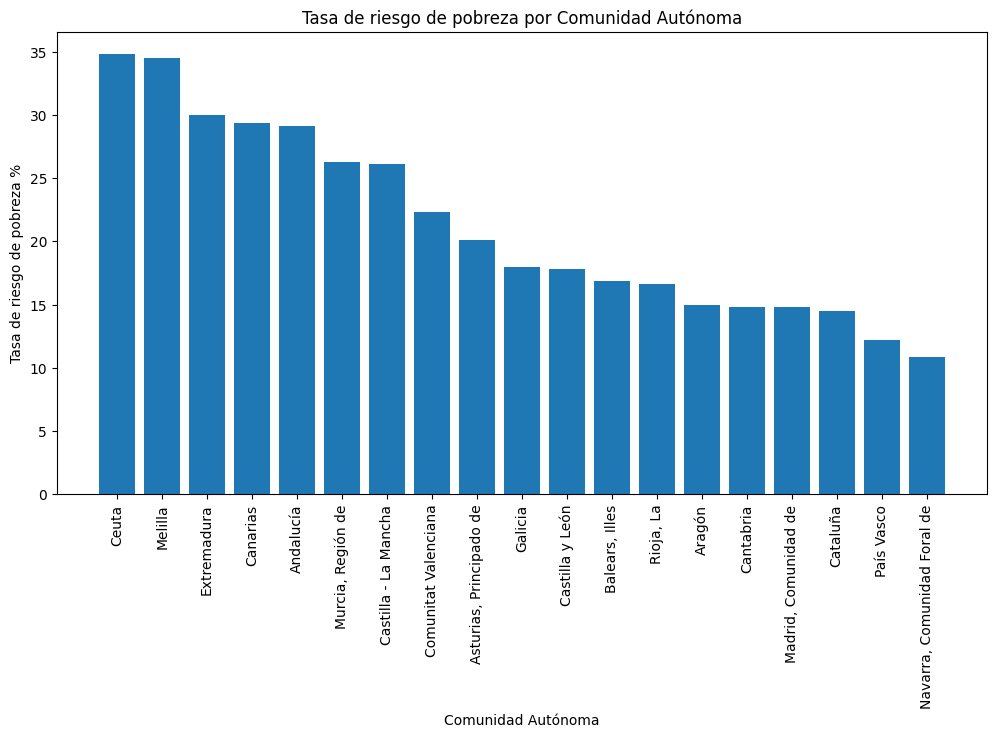

In [224]:
plt.figure(figsize=(12, 6))  
plt.bar(df_6['Comunidades y Ciudades Autónomas'], df_6['Tasa riesgo'])
plt.xlabel('Comunidad Autónoma')
plt.ylabel('Tasa de riesgo de pobreza %')
plt.title('Tasa de riesgo de pobreza por Comunidad Autónoma')
plt.xticks(rotation=90)  
#plt.savefig('../img/tasa_riesgo_pobreza.jpg', bbox_inches='tight')
plt.show()

In [50]:
#df_7 INDICE DE PRECIOS DE LA VIVIENDA

df_7 = pd.read_csv("../Data/indice_precios_vivienda_comunidad.csv", sep= ";")
filtro7 = ((df_7['Índices y tasas'] == 'Variación en lo que va de año') & (df_7['Periodo'] == '2023T2') & (df_7['General, vivienda nueva y de segunda mano']=='Vivienda nueva'))  
df_7=df_7[filtro7]
df_7['Comunidades y Ciudades Autónomas'] = df_7['Comunidades y Ciudades Autónomas'].str.split(' ', expand=True, n=1).iloc[:, 1]
df_7 = df_7.drop(columns=['Índices y tasas','Total Nacional','Periodo','General, vivienda nueva y de segunda mano'])
df_7.rename(columns={'Total': 'Indice precio vivienda nueva 2023'}, inplace=True)
df_7 = df_7.drop(df_7.index[0])
df_7=df_7.reset_index(drop=True)
df_7['Indice precio vivienda nueva 2023'] = df_7['Indice precio vivienda nueva 2023'].str.replace(',', '.')
df_7['Indice precio vivienda nueva 2023'] = df_7['Indice precio vivienda nueva 2023'].astype(float)
df_7= df_7.sort_values(by='Indice precio vivienda nueva 2023', ascending=False)
df_7['Indice precio vivienda nueva 2023'].fillna(0.1, inplace=True)
df_7

,Comunidades y Ciudades Autónomas,Indice precio vivienda nueva 2023
11,Galicia,7.6
2,"Asturias, Principado de",7.4
14,"Navarra, Comunidad Foral de",7.2
4,Canarias,7.2
1,Aragón,7.0
5,Cantabria,6.5
12,"Madrid, Comunidad de",6.2
9,Comunitat Valenciana,5.3
8,Cataluña,5.2
6,Castilla y León,5.1


In [51]:
df_7.to_csv('../Data/Indice_vivienda.csv', index=False)

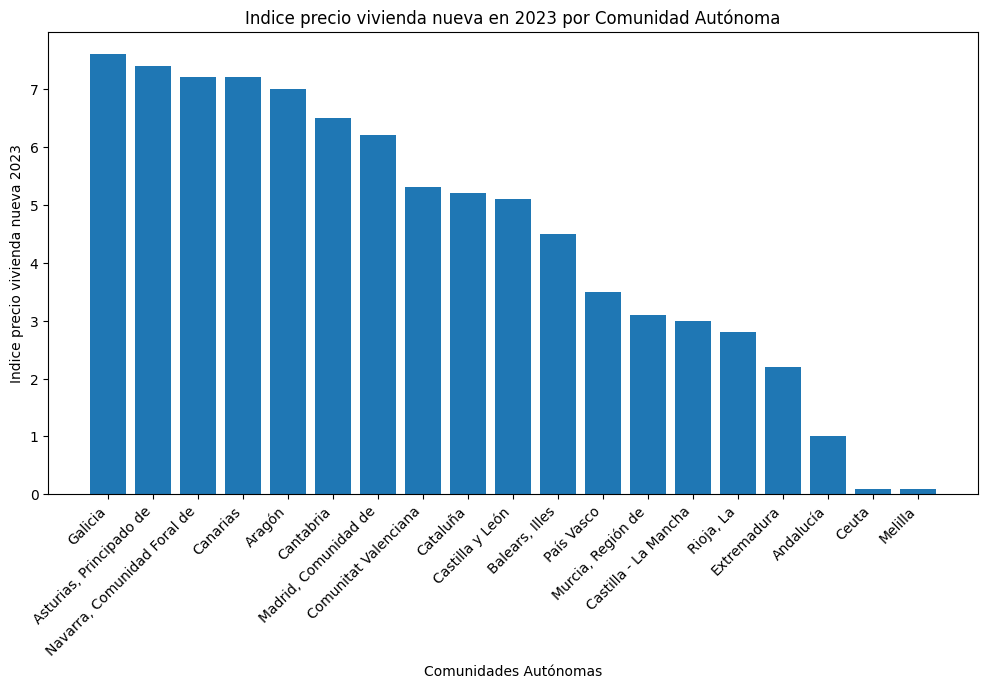

In [244]:
plt.figure(figsize=(12, 6))
plt.bar(df_7['Comunidades y Ciudades Autónomas'], df_7['Indice precio vivienda nueva 2023'])
plt.xlabel('Comunidades Autónomas')
plt.ylabel('Indice precio vivienda nueva 2023')
plt.title('Indice precio vivienda nueva en 2023 por Comunidad Autónoma')
plt.xticks(rotation=45, ha='right')  
#plt.savefig('../img/Precio_vivienda.jpg', bbox_inches='tight')
plt.show()